# Project Description #

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data Description](#data_review)
    * [Observations](#data_review)
* [Stage 2. Data Preprocessing](#data_preprocessing)
    * [2.1 Header Style](#header_style)
    * [2.2 Converting Data to the Necessary Types](#converting_values)
    * [2.3 Missing Values](#missing_values)
    * [2.4 Duplicated Values](#duplicates)
* [Stage 3. Data Processing](#data_processing)
    * [3.1 Calculating Total Sales](#activity)
    * [3.2 Number of Games Released Per Year](#activity)
    * [3.3 Which Platforms Are Leading in Sales? Which Are Growing and Which Are Shrinking? Which Platforms Are Potentially Profitable?](#activity)
    * [3.4 Sales Comparison of the Same Games on Different Platforms](#activity)
    * [3.5 Based on the General Distribution of Games by Genre, What Can Be Said About the Most Profitable Genres? Can You Generalize About Genres with High and Low Sales?](#activity)
* [Stage 4. Profile Creation](#profile)
    * [4.1 Creating a User Profile for Each Region](#activity)
* [Stage 5. Hypothesis Testing](#hypothesis)
    * [5.1 Hypothesis](#activity)
* [Conclusions](#end)
* [Additional Analysis](#end)

* [Final Conclusions of the Case Study](#end)


## Introduction <a id='intro'></a>

You work for the online store Ice, which sells video games worldwide. User and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical sales data for games are available from open sources. You need to identify patterns that determine whether a game is successful or not. This will allow you to detect promising projects and plan advertising campaigns.

You have data dating back to 2016. Let’s imagine it’s December 2016, and you’re planning a campaign for 2017.

The key is to gain experience working with data. It really doesn’t matter whether you’re forecasting 2017 sales based on 2016 data or forecasting 2027 sales based on 2026 data.

The dataset contains a "rating" column that stores the ESRB classification for each game. The Entertainment Software Rating Board evaluates the content of a game and assigns an age rating such as Teen or Adult.

## Stage 1. Data Description <a id='data_review'></a>

There is a data table that will be used for data preprocessing and exploratory analysis. Below is a description of its contents.

— Name

— Platform

— Year_of_Release

— Genre 

— NA_sales (North American sales in millions of USD) 

— EU_sales (European sales in millions of USD) 

— JP_sales (Japanese sales in millions of USD) 

— Other_sales (Other countries' sales in millions of USD) 

— Critic_Score (maximum of 100) 

— User_Score (maximum of 10) 

— Rating (ESRB)

Data from 2016 may be incomplete.


In [84]:
# Load all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns
from scipy.stats import ttest_ind

In [85]:
# Read the data
data_games = pd.read_csv('/datasets/games.csv')

# Show the first rows of the dataframe
display(data_games.head())
data_games.info()
data_games.describe()

# Identify duplicate rows
duplicate_rows = data_games.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Número de filas duplicadas: 0


### Object Type:

* It is an object of class <class 'pandas.core.frame.DataFrame'>.

### Number of Entries:

* The DataFrame has a total of 16,715 entries, ranging from 0 to 16,714.

### Number of Columns:

* There are 11 columns in total.

### Columns and Their Details:

* Name: Contains 16,713 non-null values, of type object.
* Platform: Contains 16,715 non-null values, of type object.
* Year_of_Release: Contains 16,446 non-null values, of type float64.
* Genre: Contains 16,713 non-null values, of type object.
* NA_sales: Contains 16,715 non-null values, of type float64.
* EU_sales: Contains 16,715 non-null values, of type float64.
* JP_sales: Contains 16,715 non-null values, of type float64.
* Other columns: The details of the remaining columns are not fully specified in the provided description.
* User_Score: Contains 10,014 non-null values, of type object.
* Rating: Contains 9,949 non-null values, of type object.

### Data Types:

* There are 6 columns with float64 data type.
* There are 5 columns with object data type.

#### Observations ####

### Null Values:

* Name: 2 null values.
* Year_of_Release: 269 null values.
* Genre: 2 null values.
* User_Score: 6,701 null values.
* Rating: 6,766 null values.
Null values can affect analyses, especially when a complete data sample is required.

### Data Types:

* User_Score: It is categorized as object rather than a numeric type. This may indicate the presence of non-numeric data (like "tbd" for "to be determined") in this column, complicating statistical calculations.

### Data Consistency:

* Year_of_Release: It is in float64 format, suggesting that there might be incorrect or inconsistent data (such as years with decimals, though they are not shown here). This type should be int if it only contains years.

### Missing Data in Key Columns:

* The User_Score and Rating columns have a large amount of missing data, which can complicate analyses that depend on these columns, such as evaluating the perceived quality of the games.

### Limited Geographic Analysis:

* Sales are divided into three main regions (NA, EU, JP), but the lack of other regions may limit a complete global sales view.

### Possible Outliers:

* Since there is no information on the minimum and maximum values, it is not possible to identify if there are extreme outliers that may distort the analysis.

### Consider the Following Steps:

### Data Cleaning:

* Impute or remove null values depending on the relevance of each column for the analysis.
* Convert the User_Score column to an appropriate numeric format, managing non-numeric values.

### Normalization and Consistency:

* Check and correct any inconsistencies in the data type, especially in Year_of_Release.

### Exploratory Data Analysis:

* Perform an exploratory data analysis (EDA) to identify and handle outliers and verify distributions.

### Data Enrichment:

* If possible, enrich the dataset with additional information to fill any gaps, particularly in sales regions not represented.

## Stage 2. Data Preprocessing <a id='data_review'></a>

### 2.1 Header Style ###

In [86]:
# Replace column names and make them lowercase
data_games.columns = data_games.columns.str.lower()

### 2.2 Convert the data into the necessary types ###

In [87]:
# Convert year_of_release to numeric and then to integer
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], errors='coerce')

# Convert 'user_score' to numeric (ignore non-numeric values)
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

# Convert 'critic_score' to numeric
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], errors='coerce')

data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Observations: ####

Converted Columns

* year_of_release:

Original Type: float64  
Converted Type: int64

Reason for Conversion: The release year is naturally an integer value, as it represents a calendar year. Missing values are handled by removing them before the conversion to ensure that all values in the column are valid integers.

* user_score:

Original Type: object  
Converted Type: float64

Reason for Conversion: The user score should be a numeric value representing a score, possibly with decimals. Originally, it was stored as an object type, likely due to the presence of non-numeric values or missing data. Converting it to float64 enables statistical calculations and analysis with these values.

* critic_score:

Original Type: float64  
Converted Type: float64

Reason for Conversion: Although the column was already of type float64, we ensured that all data in this column are truly numeric by explicitly converting them and handling non-numeric values with errors='coerce'.

Justification and Benefits

* Data Consistency: Ensuring data is in the correct type helps maintain consistency and facilitates subsequent analysis.
* Statistical Analysis: Having numeric data in the proper format allows for statistical calculations and the application of predictive models.
* Clear Interpretation: Properly typed data is easier to interpret and understand, both for humans and algorithms.

### 2.3 Missing Values ###

#### Identifying Missing Values ####

#### First, we identify and count the missing values in the dataframe ####

In [88]:
# Check for missing values
missing_values_before = data_games.isna().sum()

print("Valores ausentes antes de la conversión:")
print(missing_values_before)

Valores ausentes antes de la conversión:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [89]:
# Convert 'year_of_release' to integer (handle NaNs)
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

# Convert 'user_score' to numeric (handle 'TBD' and NaNs)
data_games['user_score'] = data_games['user_score'].replace('TBD', pd.NA)
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

# Convert 'critic_score' to numeric
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], errors='coerce')

# Identify missing values after conversion
missing_values_after = data_games.isna().sum()
print("Valores ausentes después de la conversión:")
print(missing_values_after)

Valores ausentes después de la conversión:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [90]:
# Handle missing values
data_games = data_games.dropna(subset=['year_of_release'])  # Remove rows without a release year
data_games['user_score'] = data_games['user_score'].fillna(data_games['user_score'].median())  # Impute medians for user_score
data_games['critic_score'] = data_games['critic_score'].fillna(data_games['critic_score'].median())  # Impute medians for critic_score
data_games['rating'] = data_games['rating'].fillna('Unknown') # Impute with Unknown for rating

# Verify the changes
print("Información del dataset después del tratamiento de valores ausentes:")
print("\n")
print("Primeros registros del DataFrame:")
display(data_games.head())
print("\nInformación del DataFrame:")
display(data_games.info())

Información del dataset después del tratamiento de valores ausentes:


Primeros registros del DataFrame:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

In [91]:
# Impute 'name' and 'genre' with generic values
data_games['name'] = data_games['name'].fillna('Unknown')
data_games['genre'] = data_games['genre'].fillna('Unknown')

# Verify that no null values remain
missing_values_final = data_games.isna().sum()
print("Valores ausentes finales:")
print(missing_values_final)

# Verify the changes
print("Información del dataframe después del tratamiento de valores ausentes:")
print("\n")
print("Primeros registros del DataFrame:")
display(data_games.head())
print("\nInformación del Dataframe:")
display(data_games.info())


Valores ausentes finales:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
Información del dataframe después del tratamiento de valores ausentes:


Primeros registros del DataFrame:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown



Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

#### Missing Values Treatment ####

To decide how to handle missing values, it's important to consider the nature of each column, the possible reasons why values may be missing, and how these data are used in the analysis, including the abbreviation 'TBD' in user_score.

1. name

* Missing Values: 2
* Action: Fill with 'Unknown Game'.
* Justification: It is essential that each record has an identifiable name, even if it is generic, to maintain data integrity.

2. year_of_release

* Missing Values: 269
* Action: Delete Rows without Release Year.
* Justification: Avoid introducing biases from incorrect imputations. Simplifies temporal analysis by working only with complete data.

    Since the number of affected records is small (less than 5% of the total), it can be considered a reasonable and most appropriate action in this case.

3. genre

* Missing Values: 2
* Action: Fill with 'Unknown'.
* Justification: Genre is a descriptive category that can influence the analysis of preferences and trends. Using 'Unknown' allows maintaining these records without introducing biases.

4. critic_score

* Missing Values: 8578
* Action: Fill with the median of critic scores.
* Justification: The median is an appropriate measure that is not affected by outliers, providing a reasonable estimate for missing values.

5. user_score

* Missing Values: 9125
* Action: Replace 'TBD' with pd.NA and then fill with the median of user scores.
* Justification: The abbreviation 'TBD' indicates that the score was not available yet. Converting these values to pd.NA allows handling missing values uniformly. Using the median of user scores is appropriate for maintaining a reasonable estimate.

6. rating

* Missing Values: 6766
* Action: Fill with 'Unknown'.
* Justification: The rating is a descriptive category that affects how games are perceived, especially in terms of suitability for different ages. Using 'Unknown' keeps these records useful without introducing biases, allowing for better clarity.

Possible Reasons for Missing Values

* name and genre: Missing values may be due to data entry errors or incomplete records.
* year_of_release: It may be missing for games that have not been released at the time of data collection or for incomplete records.
critic_score and user_score:

* Scores may not be available if the game has not been reviewed or if the data has not been collected yet. 'TBD' indicates that a future score was expected but has not been determined yet.

* rating: Missing values may be because the game has not yet been rated by an official rating agency.

Conclusion

Imputing missing values with the median or a generic value allows for maintaining as much data as possible for future analysis without introducing significant biases. Additionally, properly handling 'TBD' ensures that missing data is handled uniformly and consistently.

### 2.4 Duplicated Values ###

In [92]:
# Check for duplicate rows
print(data_games.duplicated().sum())

0


## Stage 3. Analyze the Data <a id='data_review'></a>

### 3.1 Calculation of Total Sales ###


In [93]:
# Calculate total sales in all regions for the corresponding game.
data_games['total_sales'] = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#### Observations: ####

* data_games: This is the DataFrame that contains the video game sales data.

* [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:

Here, we are selecting specific columns from the DataFrame that represent sales in different regions: North America (na_sales), Europe (eu_sales), Japan (jp_sales), and other regions (other_sales).

This selection returns a new DataFrame containing only these four columns.

* .sum(axis=1):

The .sum() method is used to sum values along a specified axis.

axis=1 indicates that we want to perform the sum along the rows. In other words, for each row, we sum the values from the selected columns (na_sales, eu_sales, jp_sales, other_sales).

If we used axis=0, the sum would be performed along the columns, which is not what we want in this case.

* data_games['total_sales'] =

The result of the summation operation is a Pandas Series, where each value is the sum of sales for a row (i.e., for a specific video game).

We assign this Series to a new column in the data_games DataFrame called total_sales.

In [94]:
# Display the dataframe
display(data_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown,31.38


### 3.2 Number of Games Released per Year ###

#### Significance Analysis ####

To evaluate if the data for each period is significant, consider the following points:

* Consistency in the number of games released: If the number of games released per year varies significantly, data from years with fewer releases may be less representative.
* Industry trends: Years with more releases may coincide with periods of boom in the video game industry, while years with fewer releases may coincide with recessions or technological transitions.


Número de juegos lanzados cada año:


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

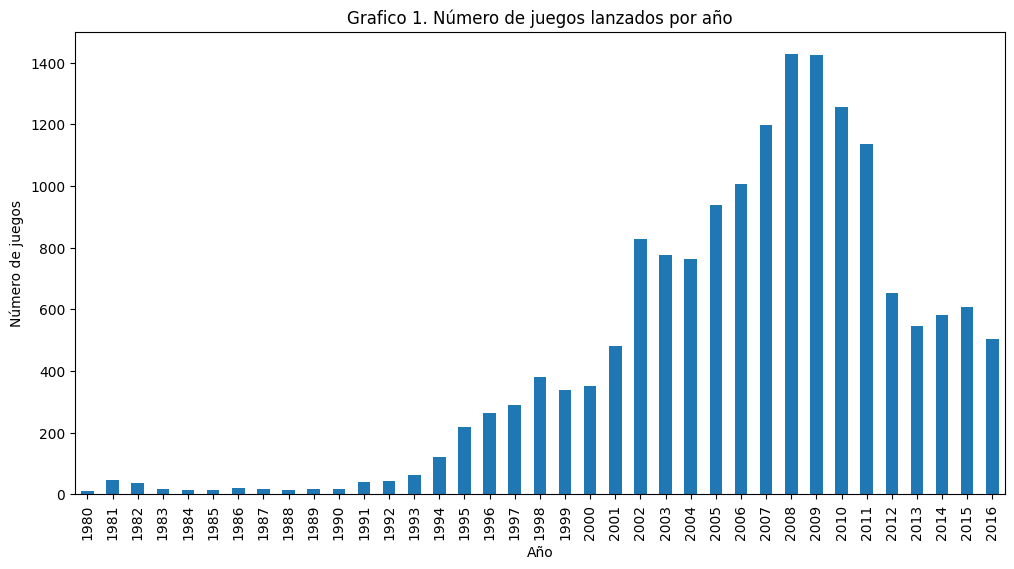

In [95]:
# Count games released by year
games_per_year = data_games['year_of_release'].value_counts().sort_index()

# Show the results
print("Número de juegos lanzados cada año:")
display(games_per_year)

# Plot
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Grafico 1. Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show()

#### Evaluation of Significance ####

* Periods with Few Data:

    1980 - 1990: Few releases, which could mean that these data are less representative of the industry compared to later years.
    
    1983 - 1989: Years with fewer than 20 releases, which may not be significant due to the low amount of data.

* Periods with Many Data:

    1995 - 2010: Period of sustained growth and numerous releases, highly representative of the industry.

    2008 - 2009: Peaks in releases, likely significant and relevant for industry analysis in those years.

* Recent Years (2011 - 2016): Although there is a decrease in the number of releases, these years still have enough data to be considered representative.

Conclusion

* Significant Data: Periods from the mid-90s to 2010 are highly significant due to the large number of releases.
* Less Significant Data: The 80s and early 90s may not be as representative due to the smaller number of releases.

### Determine the data period to build a model for 2017, considering relevant values without taking into account data from previous years. ###

First, we must determine the most relevant period and build a model:

Number of games released per year:

* 1980 - 1990: Few releases, less representative data.

* 1991 - 1999: Gradual increase, but still lower compared to later years.

* 2000 - 2010: Period of significant growth with many releases, highly representative.

* 2011 - 2016: Gradual decrease, but with still significant figures.

Trends and relevance:

* The years with the highest number of releases (2000-2010) provide a good base of representative data.

* The most recent years (2011-2016) are critical to capture current trends and build a predictive model for 2017.

To build an accurate model for 2017, it is relevant to use data from the most recent years to capture the latest trends. Based on the previous analysis, I consider that the data from 2000 to 2016 are the most relevant for the analysis, as they:

Capture a period with a significant number of releases.
Include the most recent and relevant trends.

In [96]:
# Filter data for the period 2000-2016
filtered_data_games = data_games[(data_games['year_of_release'] >= 2000) & (data_games['year_of_release'] <= 2016)]

# Verify the result
print("Primeros registros del DataFrame filtrado:")
display(filtered_data_games.head())

print("\nInformación del DataFrame después de filtrar por el período 2000-2016:")
print(filtered_data_games.info())

Primeros registros del DataFrame filtrado:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91



Información del DataFrame después de filtrar por el período 2000-2016:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  Int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     14470 non-null  float64
 9   user_score       14470 non-null  float64
 10  rating           14470 non-null  object 
 11  total_sales      14470 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.4+ MB
None


### 3.3 Which platforms are leading in sales? Which ones are growing and which are declining? Which platforms are potentially profitable? ###

We will break down the question into three steps for development:

* Calculate the total sales by platform from 2000 to 2016.

* Visualize sales by platform over time to identify trends.

* Identify the leading platforms and those showing growth or decline.

In [97]:
# Calculate total sales by platform in the period 2000-2016.

# Calculate total sales by platform
platform_sales = filtered_data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

<Figure size 1400x800 with 0 Axes>

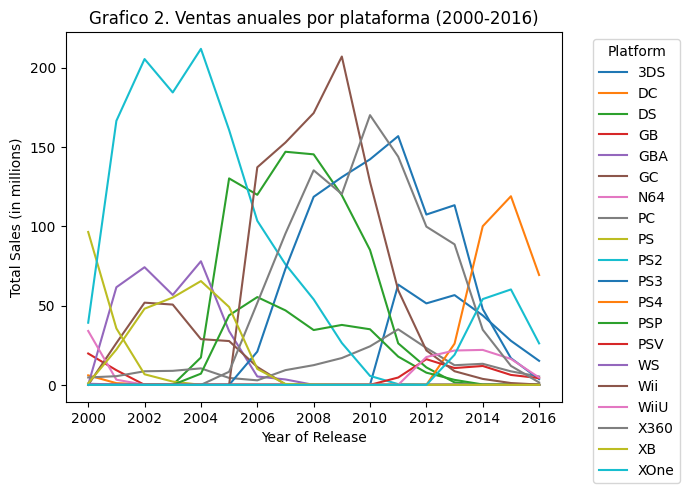

In [98]:
# Visualize sales by platform over time to identify trends.

# Calculate annual sales by platform
annual_platform_sales = filtered_data_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Plot annual sales by platform
plt.figure(figsize=(14, 8))
annual_platform_sales.plot()
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Grafico 2. Ventas anuales por plataforma (2000-2016)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Note ####

The unstack() method transforms the lower level of the hierarchical index (in this case, platform) into columns. The result is a DataFrame where each row corresponds to a release year and each column to a platform, with the corresponding total sales as values.

If you have a grouped DataFrame like this:

year_of_release        platform

2000                   PS2              100

2000                   Xbox             50

2001                   PS2              120

2001                   Xbox             80

2002                   PS2              130

Name: total_sales, dtype: int64

Using unstack() would transform it into:

platform             PS2    Xbox

year_of_release  

2000                100         50

2001                120         80

2002                130         0

#### Trend Analysis ####

Platforms with High Sales Peaks:

* PS2: Dominated the market in the early 2000s with a very high peak around 2003-2004.
* DS: Shows a significant peak around 2007-2009.
* PS3 and X360: Show high peaks around 2008-2010.

Recently Growing Platforms:

* PS4: Shows a notable increase in sales from 2013-2016.
* XOne: Also shows growth towards the end of the analyzed period.
* 3DS: Has a consistent performance with a slight increase towards the end of the period.

Declining Platforms:

* PS2, PS3, X360, Wii: Although these platforms were leaders in sales, their trends show a significant decline in the later years of the analyzed period.
* DS: After its peak, sales decreased notably.

Potentially Profitable Platforms Selection

Based on the visual analysis and data, the potentially profitable platforms to focus on in 2017 are:

* PS4: Shows consistent growth and is one of the most recent platforms with strong performance.
* XOne: Also shows growth towards the end of the period, indicating it could remain relevant.
* 3DS: Maintains steady performance with slight growth.
* PC: Although not the highest in sales, it has maintained consistent relevance and has a dedicated market.

These platforms are suitable for analysis and advertising campaign planning due to their recent relevance and growth potential.

In [99]:
# Identify the leading platforms and those showing growth or decline

# Show total sales by platform
print("Ventas totales por plataforma (2000-2016):")
print(platform_sales)

Ventas totales por plataforma (2000-2016):
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64


#### Observations ####

Leading Sales Platforms

* PS2 (1233.56 million)
* X360 (961.24 million)
* PS3 (931.34 million)
* Wii (891.18 million)
* DS (802.76 million)

These are the platforms with the highest total sales and are undisputed leaders in the market.

Platforms with Recent Growth

* PS4 (314.14 million)
* 3DS (257.81 million)
* XOne (159.32 million)

These platforms show significant sales in recent years and are potentially profitable.

Declining Platforms

* PS2, X360, PS3, Wii, and DS, although they have high total sales, are older and are likely in decline compared to the new generations.

Selection of Potentially Profitable Platforms

* To identify the most profitable platforms for analysis and advertising campaigns for 2017, both the total sales volume and recent growth trends should be considered.

#### Conclusion ####

To build a predictive model for 2017, the following platforms can be selected:

* PS4 - High recent sales and growth potential.
* XOne - Good representation in recent sales.
* 3DS - Strong recent sales and potentially profitable.
* PC - Although not the highest in total sales, it maintains constant relevance.

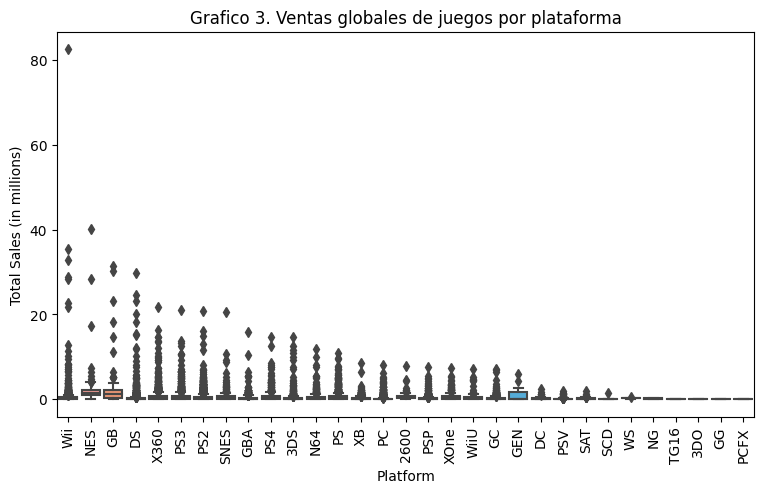

In [100]:
# Create box plot
plt.figure(figsize=(9, 5))
sns.boxplot(x='platform', y='total_sales', data=data_games)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Grafico 3. Ventas globales de juegos por plataforma')
plt.xticks(rotation=90)
plt.show()

#### Observations ####

Sales Variability:

* Wii: It has a game that stands out significantly with sales close to 80 million units. The median sales for Wii are also high compared to other platforms.
* NES and GB: Both platforms have a high sales median and show significant variability, although not as much as Wii.
* Modern Platforms (like PS4, XOne): They have a narrower sales distribution and a lower median compared to older platforms like Wii, NES, and GB.

Average Sales (Mean):

* The mean sales might be influenced by outliers. For example, extremely high sales on Wii could significantly increase the mean.
* Platforms with fewer successful games (high outliers) will have a lower mean compared to their median.

Significant Differences:

* The differences in sales seem to be significant, especially when comparing platforms like Wii with less successful ones (e.g., platforms like GEN or SAT).
* The boxplots show that there is greater variability in sales for successful platforms, indicating that these platforms have had both big hits and less successful games.

Detailed Findings:

* Wii: Sales are significantly higher on average due to several very successful games.
* NES and GB: Although they don't have peaks as high as Wii, they also show high sales and a wide distribution.
* DS, PS2, X360: These platforms have a broader distribution and moderate medians, indicating a range of moderately successful sales.
* Minor Platforms (like TG16, 3DO, GG): They have consistently low sales, with little variability and few high outliers.

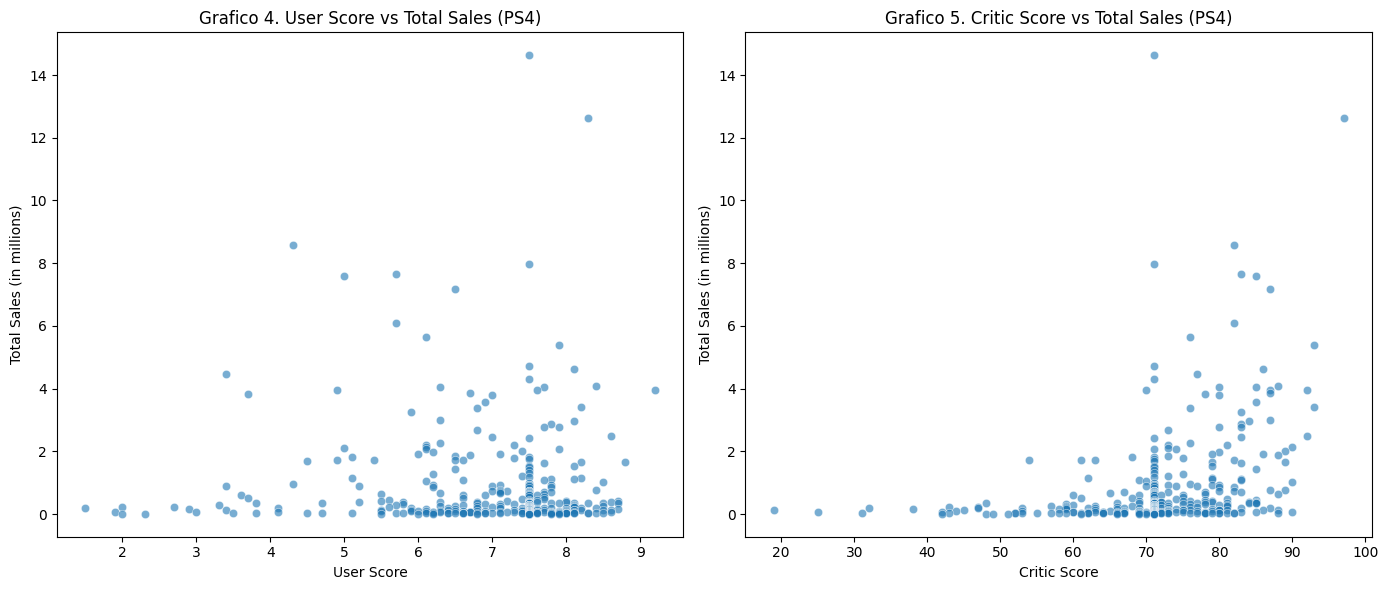

Correlación entre User Score y Total Sales: -0.06275557891282788
Correlación entre Critic Score y Total Sales: 0.3387064530024634


In [101]:
# Filter data for PS4 platform
ps4_data = filtered_data_games[filtered_data_games['platform'] == 'PS4']

# Create scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for User_Score vs Total_Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales', alpha=0.6)
plt.title('Grafico 4. User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for Critic_Score vs Total_Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales', alpha=0.6)
plt.title('Grafico 5. Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation_user_score = ps4_data['user_score'].corr(ps4_data['total_sales'])
correlation_critic_score = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre User Score y Total Sales: {correlation_user_score}")
print(f"Correlación entre Critic Score y Total Sales: {correlation_critic_score}")

#### Observations ####

User Score vs Total Sales (PS4):

* X-Axis: User Score, ranging from 0 to 10.
* Y-Axis: Total sales in millions of units.

Score Distribution:

   * Most games have user scores between 5 and 8.
   * Total sales do not show a clear correlation with user scores. There are games with low scores (between 2 and 4) that have decent sales, and games with high scores (between 8 and 9) with moderate sales.
   * Some games with user scores between 6 and 8 have significantly high sales, reaching up to 14 million units.

Critic Score vs Total Sales (PS4):

* X-Axis: Critic Score, ranging from 0 to 100.
* Y-Axis: Total sales in millions of units.

Score Distribution:

* Most games have critic scores between 50 and 90.
* Similar to the user score chart, there is no clear correlation between critic scores and total sales.
* Some games with high critic scores (70 to 90) have significant sales, but there are also games with low scores (below 50) that have moderate sales.
* Games with critic scores around 80 seem to have a wide range of sales, with some reaching up to 14 million units.

Correlation between User Score and Total Sales:

* Correlation Value: -0.06275557891282794

   Interpretation: This value is very close to 0, indicating a very weak negative correlation between user score and total sales. In other words, there is no significant relationship between user scores and game sales. A game's sales are not notably affected by its user score.

Correlation between Critic Score and Total Sales:

* Correlation Value: 0.3387064530024636

   Interpretation: This value indicates a moderate positive correlation between critic score and total sales. Although it is not a strong correlation, it suggests a moderate trend where games with better critic scores tend to have higher sales. However, this correlation is not strong enough to be a reliable predictor on its own.

Findings:

* There is no strong correlation between the scores (user or critic) and the total sales of PS4 games.
* User and critic scores seem to have a wide distribution, but high sales are not limited to games with high scores.
* There are some outliers where games with moderate or low scores have significantly high sales.

Conclusion:

* User Score: The correlation close to zero confirms that there is no significant relationship between user scores and game sales.
* Critic Score: The moderate correlation suggests that critic reviews may influence sales, but they are not the only determining factor.

These findings reinforce the idea that scores, both user and critic, are only part of the bigger picture. Additional factors, such as marketing, game brand, release timing, and other elements, also play important roles in a game's commercial success.

### 3.4 Comparison of Sales of the Same Games on Other Platforms ###

At this point, we will develop this in four steps:

* Step 1: Identify common games: Find games that are available on multiple platforms.
* Step 2: Analyze sales by platform: Compare the sales of these games across different platforms.
* Step 3: Correlation of reviews and sales: Calculate the correlation between reviews and sales for these platforms.
* Step 4: Compare Sales of Common Games

Correlación entre User Score y Total Sales en PS4: -0.0724980318418173
Correlación entre Critic Score y Total Sales en PS4: 0.3295762359430234
Correlación entre User Score y Total Sales en XOne: -0.12136595132324514
Correlación entre Critic Score y Total Sales en XOne: 0.3432639646948854


<Figure size 2000x1000 with 0 Axes>

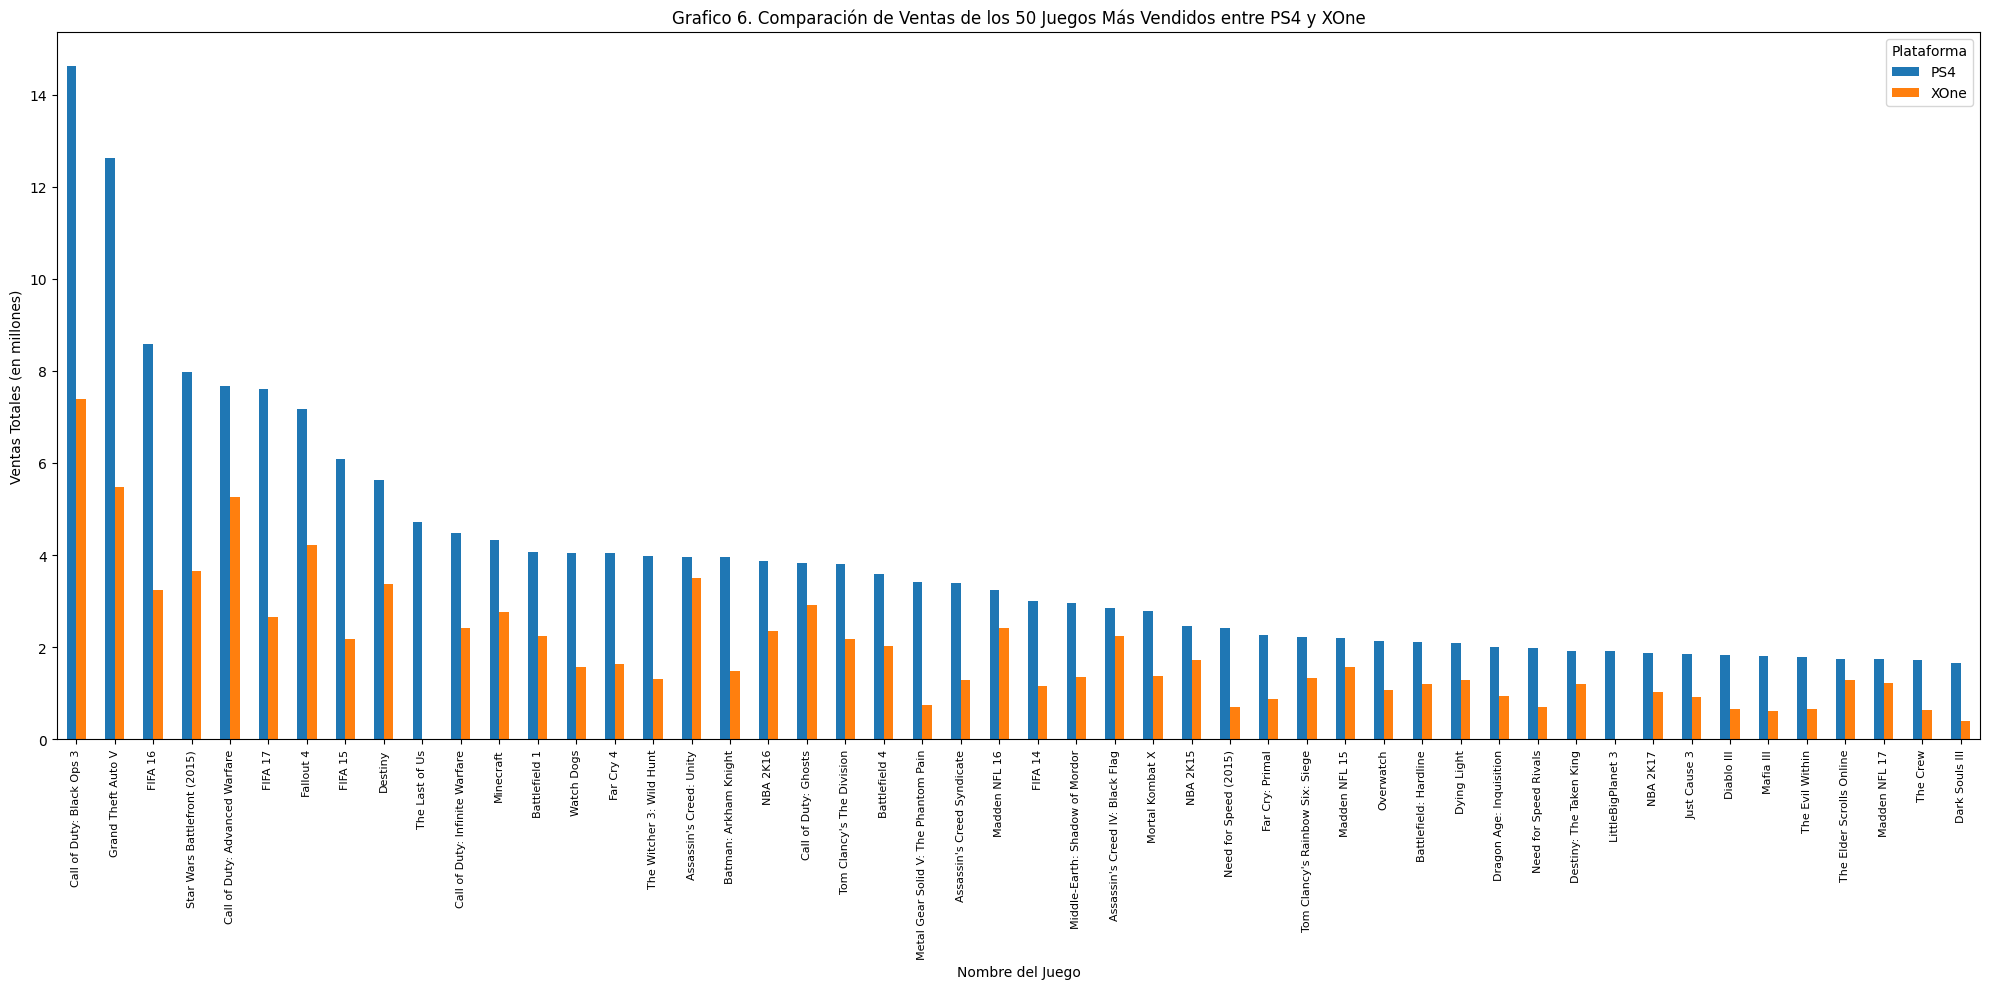

In [102]:
# Step 1: Identify Common Games

# Filter only games available on multiple platforms
games_on_multiple_platforms = data_games[data_games['name'].duplicated(keep=False)]

# Step 2: Analyze Sales by Platform

# Group by game name and platform to compare sales
platform_sales_comparison = games_on_multiple_platforms.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Step 3: Calculate Correlation of Reviews and Sales by Platform

# Filter data for PS4 and XOne
ps4_data = games_on_multiple_platforms[games_on_multiple_platforms['platform'] == 'PS4']
xone_data = games_on_multiple_platforms[games_on_multiple_platforms['platform'] == 'XOne']

# Calculate correlation for PS4
ps4_user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
ps4_critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

# Calculate correlation for XOne
xone_user_corr = xone_data['user_score'].corr(xone_data['total_sales'])
xone_critic_corr = xone_data['critic_score'].corr(xone_data['total_sales'])

# Show the results
print("Correlación entre User Score y Total Sales en PS4:", ps4_user_corr)
print("Correlación entre Critic Score y Total Sales en PS4:", ps4_critic_corr)
print("Correlación entre User Score y Total Sales en XOne:", xone_user_corr)
print("Correlación entre Critic Score y Total Sales en XOne:", xone_critic_corr)

# Step 4: Compare Sales of Common Games

# Compare sales of common games between PS4 and XOne
common_games = platform_sales_comparison.loc[:, ['PS4', 'XOne']].dropna()

# Select the top 50 best-selling games to make the graph more readable
top_common_games = common_games.sort_values(by='PS4', ascending=False).head(50)

# Plot sales comparison
plt.figure(figsize=(20, 10))  # Adjust figure size
top_common_games.plot(kind='bar', figsize=(20, 10))
plt.title('Grafico 6. Comparación de Ventas de los 50 Juegos Más Vendidos entre PS4 y XOne')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=90, fontsize=8)  # Rotate labels and adjust font size
plt.legend(title='Plataforma')
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()

#### Observations ####

PS4:

Correlation between User Score and Total Sales on PS4: -0.0725

* Interpretation: The correlation is very weak and negative. This suggests that user scores do not have a significant relationship with total game sales on PS4. In fact, a slight negative trend indicates that as user scores increase, sales tend to decrease, although insignificantly.

Correlation between Critic Score and Total Sales on PS4: 0.3296

* Interpretation: The moderate positive correlation indicates that critic scores have a somewhat significant relationship with sales. Games with better critic scores tend to sell more, although this relationship is not extremely strong.

Xbox One (XOne):

Correlation between User Score and Total Sales on XOne: -0.1214

* Interpretation: The weak negative correlation suggests that there is a slight trend for user scores not to positively influence sales. In fact, higher user scores may be slightly associated with lower sales, although this relationship is very weak.

Correlation between Critic Score and Total Sales on XOne: 0.3433

* Interpretation: Similar to PS4, there is a moderate positive correlation between critic scores and sales. This suggests that on the XOne platform, critic scores also play a role in influencing game sales.

Sales Comparison between PS4 and XOne

* Common Games: The graph shows that, in general, games tend to sell more on PS4 compared to XOne. This may be due to a larger user base or consumer preference for PS4.
* Sales Variability: The variability in sales is notable, with some games showing a significant difference in sales between the two platforms.
* Top Sales: Best-selling games like "Call of Duty: Black Ops 3" and "Grand Theft Auto V" have notably high sales on both platforms, but even more so on PS4.
* Sales Trends: Games from popular franchises tend to perform well on both platforms, with a tendency towards higher sales on PS4.

General Conclusion

* User scores do not have a significant influence on game sales on either platform, and in some cases, may have a negative relationship.
* Critic scores have a moderate influence on sales, suggesting that professional reviews may be more important for consumers when deciding which games to buy.
* Games tend to sell more on PS4 than on XOne, which may be influenced by market preference and the user base of each platform.

### 3.5 According to the general distribution of games by genre, what can be said about the most profitable genres? Can you generalize about genres with high and low sales? ###

genre
Action          1526.16
Sports          1130.92
Shooter          912.70
Role-Playing     731.22
Misc             718.35
Racing           561.06
Platform         494.42
Simulation       335.41
Fighting         311.90
Adventure        183.74
Puzzle           138.20
Strategy         115.07
Name: total_sales, dtype: float64


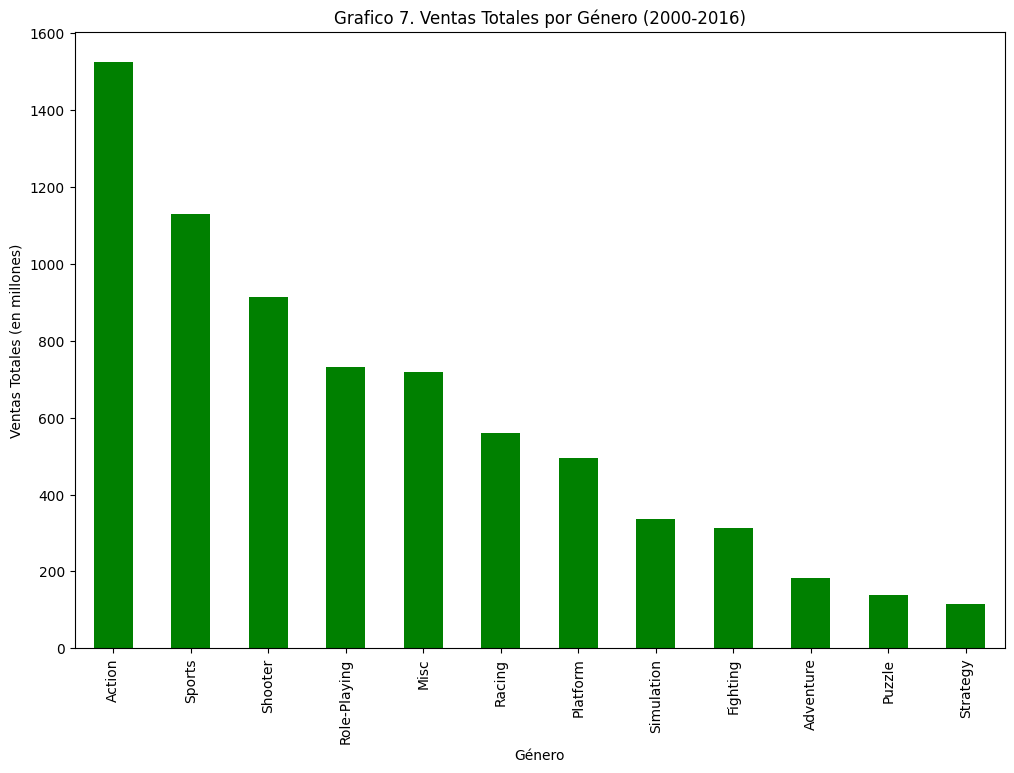

In [103]:
# Calculate total sales by genre
genre_sales = filtered_data_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

# Plot total sales by genre
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar', color='green')
plt.title('Grafico 7. Ventas Totales por Género (2000-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=90)
plt.show()

#### Observations ####

Most Profitable Genres:

* Action: With total sales of 1526.16 million units, the action genre is the most profitable. This suggests that action games are extremely popular and likely have high demand.
* Sports: With 1130.92 million units sold, sports games are also highly profitable, ranking second.
* Shooter: Shooter games (912.70 million units) rank third, indicating high popularity.

Moderately Profitable Genres:

* Role-Playing: With 731.22 million units, role-playing games show significant sales, indicating a dedicated player base.
* Misc: Games categorized as 'Misc' (Miscellaneous) have sales of 718.35 million, which may include a variety of subgenres.
* Racing: Racing games, with 561.06 million units, are also popular and have moderately high sales.
* Platform: With 494.42 million units, platform games are profitable but not as much as the previously mentioned genres.

Less Profitable Genres:

* Simulation: Simulation games have sales of 335.41 million units, indicating lower popularity compared to the top genres.
* Fighting: With 311.90 million units sold, fighting games are at the lower end of the profitability list.
* Adventure: Adventure games have sales of 183.74 million units, showing lower popularity.
* Puzzle: With 138.20 million units, puzzle games have relatively low sales.
* Strategy: With 115.07 million units, strategy games are the least profitable of all listed genres.

Conclusions:

* Popularity of Action and Sports: Action and sports genres dominate the video game market, suggesting a widespread preference for dynamic and competitive games.
* Diversification of Shooters and RPGs: Shooter and role-playing genres are also very popular, indicating a diverse player base with varied interests.
* Lower Demand for Strategy and Puzzle Games: Strategy and puzzle games have low sales, which may indicate smaller, more niche markets.

Marketing Implications:

* Focus Campaigns on Popular Genres: To maximize sales, marketing campaigns should focus on popular genres such as action, sports, and shooters.
* Explore Opportunities in Profitable Niches: Although strategy and puzzle games have low sales, they may represent opportunities to capture specific markets with targeted campaigns.

## Stage 4. User Profile Creation ##

### 4.1 Creating a User Profile for Each Region ###

For each region (NA, EU, JP), determine:

* The top five platforms. Describe variations in their market share from one region to another.
* The top five genres. Explain the differences.
* Whether ESRB ratings affect sales in individual regions.

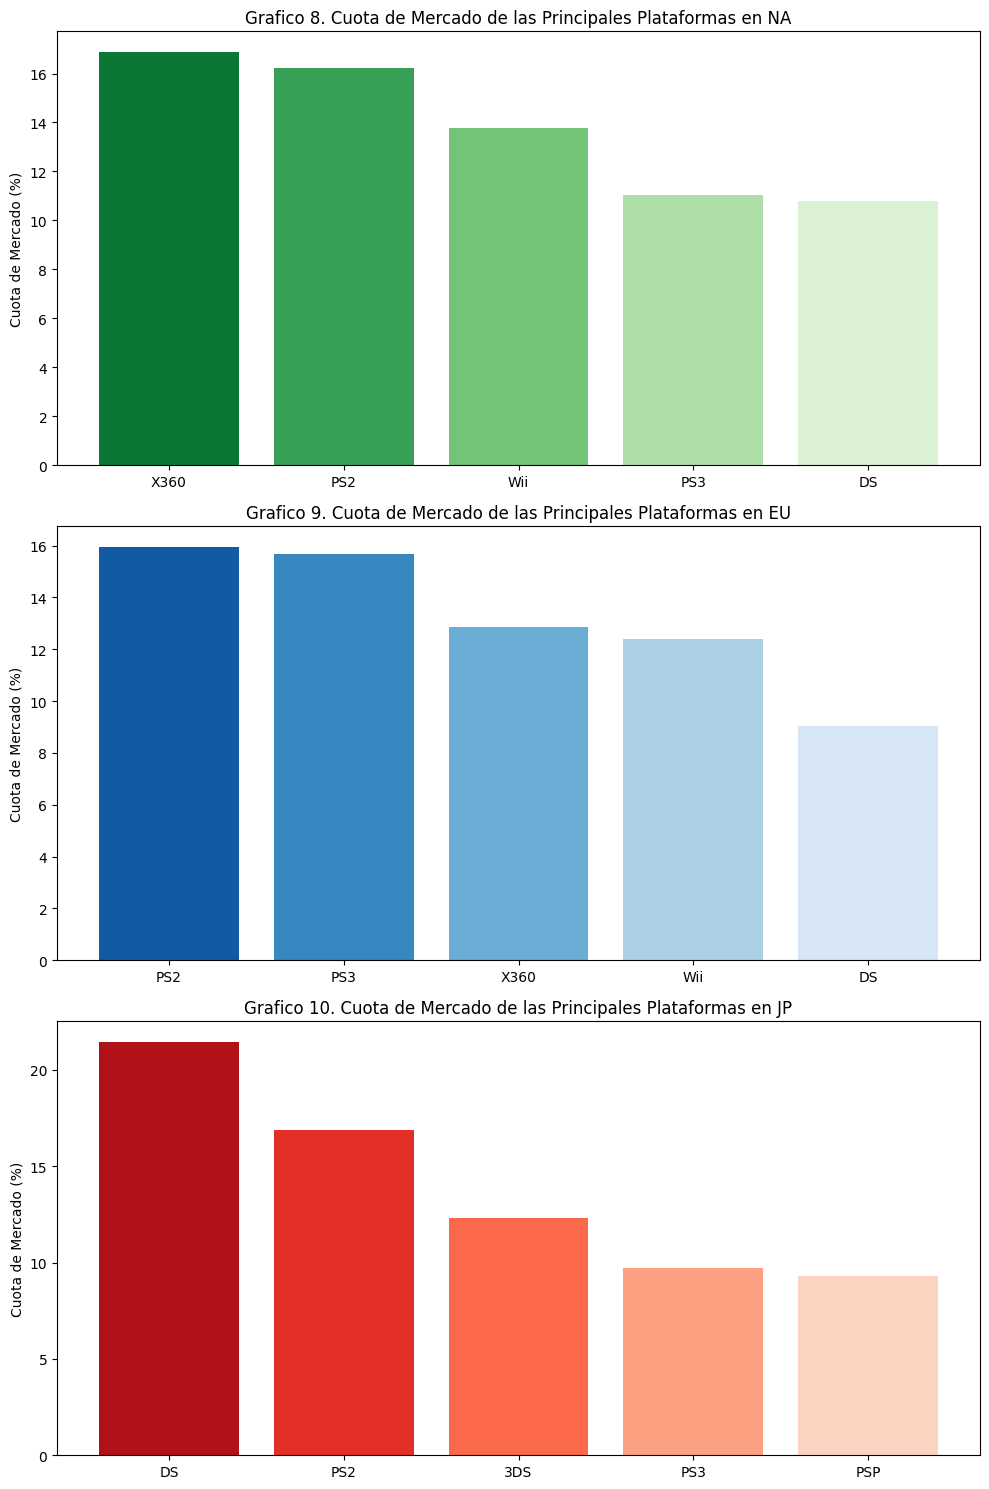

In [104]:
# Group sales by platform and region
platform_sales_by_region = filtered_data_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Get the top five platforms for each region
top5_na = platform_sales_by_region.nlargest(5, 'na_sales')
top5_eu = platform_sales_by_region.nlargest(5, 'eu_sales')
top5_jp = platform_sales_by_region.nlargest(5, 'jp_sales')

# Calculate market shares for top platforms in each region
total_na_sales = platform_sales_by_region['na_sales'].sum()
total_eu_sales = platform_sales_by_region['eu_sales'].sum()
total_jp_sales = platform_sales_by_region['jp_sales'].sum()

top5_na['market_share'] = top5_na['na_sales'] / total_na_sales * 100
top5_eu['market_share'] = top5_eu['eu_sales'] / total_eu_sales * 100
top5_jp['market_share'] = top5_jp['jp_sales'] / total_jp_sales * 100

# Create a user profile for each region
profile_na = pd.DataFrame({
    'sales': top5_na['na_sales'],
    'market_share': top5_na['market_share']
})

profile_eu = pd.DataFrame({
    'sales': top5_eu['eu_sales'],
    'market_share': top5_eu['market_share']
})

profile_jp = pd.DataFrame({
    'sales': top5_jp['jp_sales'],
    'market_share': top5_jp['market_share']
})

# Define reversed color palettes for each region
palette_na = sns.color_palette("Greens", n_colors=5)[::-1]  # Reversed blue palette for NA
palette_eu = sns.color_palette("Blues", n_colors=5)[::-1]  # Reversed green palette for EU
palette_jp = sns.color_palette("Reds", n_colors=5)[::-1]  # Reversed red palette for JP

# Plot market shares of top platforms in each region
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot for NA
ax[0].bar(profile_na.index, profile_na['market_share'], color=palette_na)
ax[0].set_title('Grafico 8. Cuota de Mercado de las Principales Plataformas en NA')
ax[0].set_ylabel('Cuota de Mercado (%)')

# Plot for EU
ax[1].bar(profile_eu.index, profile_eu['market_share'], color=palette_eu)
ax[1].set_title('Grafico 9. Cuota de Mercado de las Principales Plataformas en EU')
ax[1].set_ylabel('Cuota de Mercado (%)')

# Plot for JP
ax[2].bar(profile_jp.index, profile_jp['market_share'], color=palette_jp)
ax[2].set_title('Grafico 10. Cuota de Mercado de las Principales Plataformas en JP')
ax[2].set_ylabel('Cuota de Mercado (%)')

plt.tight_layout()
plt.show()

#### Observations ####

Variations of the five main platforms:

* X360 is strong in NA, less so in EU, and almost nonexistent in JP.
* PS2 is consistent across all regions.
* Wii and PS3 have moderate presence in NA and EU, but not in JP.
* DS dominates in JP, less so in NA and EU.
* 3DS and PSP are only significant in JP.

Los cinco géneros principales son: ['Action', 'Sports', 'Misc', 'Role-Playing', 'Adventure']


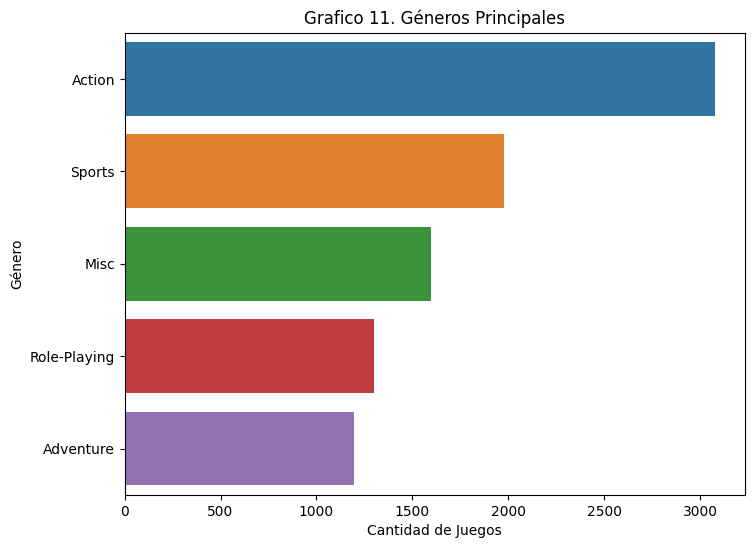

In [105]:
# Get the top five genres overall
top5_genres = filtered_data_games['genre'].value_counts().head(5).index.tolist()

print("Los cinco géneros principales son:", top5_genres)

# Plot top genres
plt.figure(figsize=(8, 6))
sns.countplot(y='genre', data=filtered_data_games, order=filtered_data_games['genre'].value_counts().head(5).index)
plt.title('Grafico 11. Géneros Principales')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()

#### Observations ####

Differences between the five main genres:

* Action is the dominant genre, with almost twice as many games as Sports.
* Sports and Misc are in second place, closely followed by Role-Playing and Adventure.

Ventas por clasificación ESRB en América del Norte (NA):
rating
AO            1.26
E          1249.26
E10+        345.50
EC            1.53
M           727.80
RP            0.00
T           709.86
Unknown     494.40
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en Europa (EU):
rating
AO           0.61
E          690.61
E10+       183.33
EC           0.11
M          472.40
RP           0.03
T          392.71
Unknown    345.81
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en Japón (JP):
rating
AO           0.00
E          189.91
E10+        40.20
EC           0.00
M           57.84
RP           0.00
T          131.01
Unknown    396.86
Name: jp_sales, dtype: float64
Index(['rating', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales'], dtype='object')


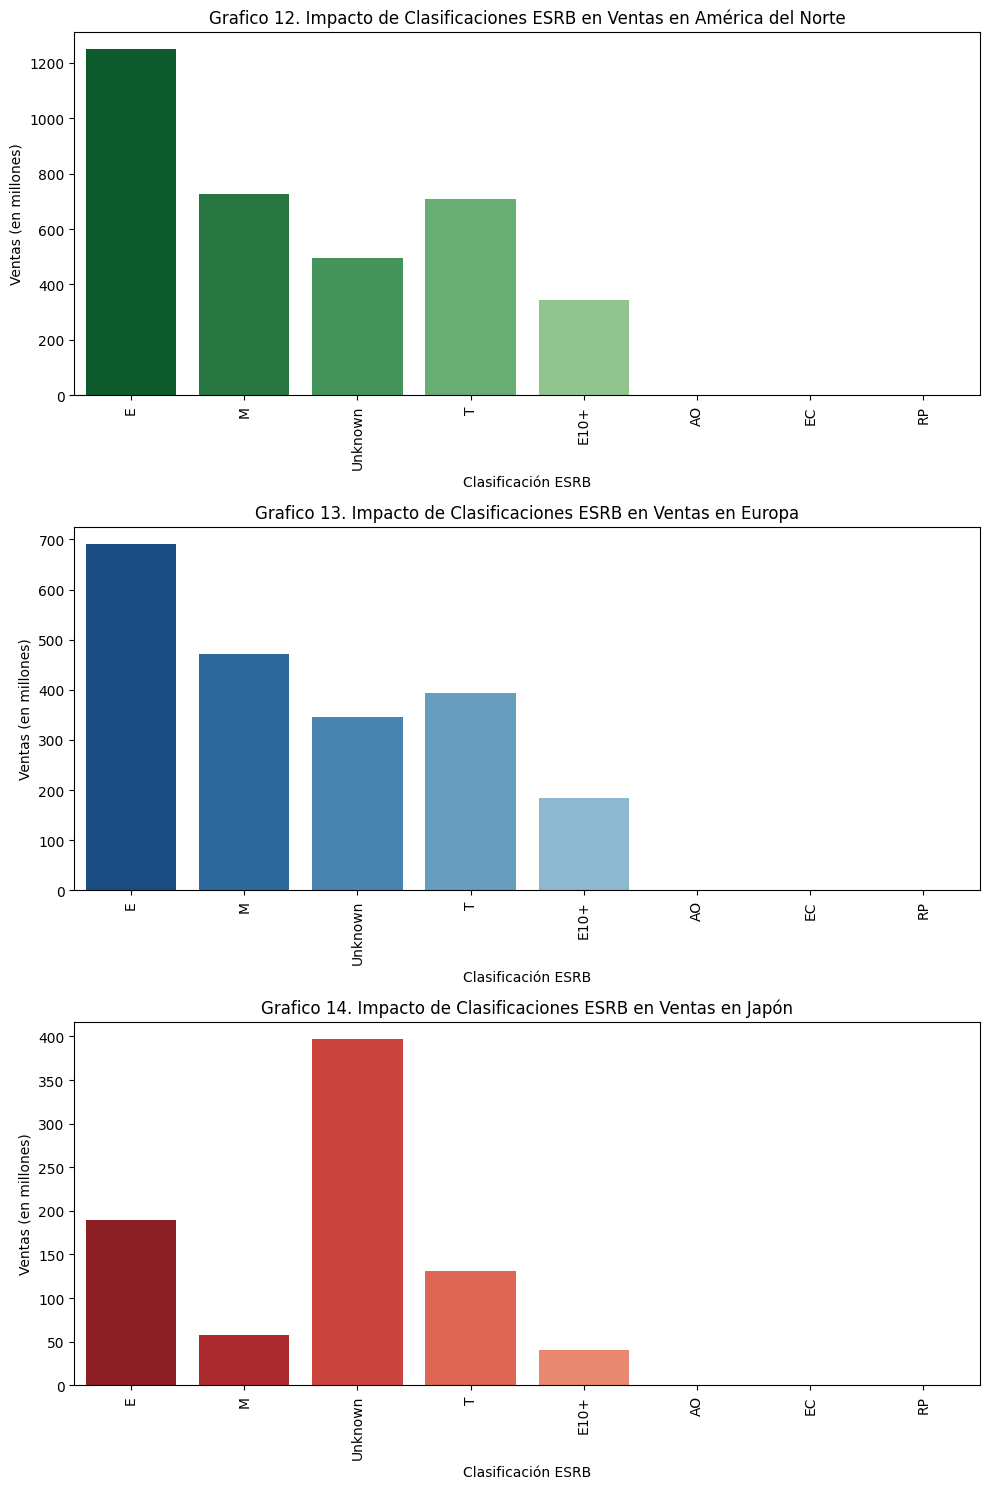

In [106]:
# Calculate total sales by ESRB rating and region
sales_by_rating_region = filtered_data_games.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("Ventas por clasificación ESRB en América del Norte (NA):")
print(sales_by_rating_region['na_sales'])

print("\nVentas por clasificación ESRB en Europa (EU):")
print(sales_by_rating_region['eu_sales'])

print("\nVentas por clasificación ESRB en Japón (JP):")
print(sales_by_rating_region['jp_sales'])

# Sort by total sales in descending order for each region
sales_by_rating_region['total_sales'] = sales_by_rating_region.sum(axis=1)
sales_by_rating_region = sales_by_rating_region.sort_values(by='total_sales', ascending=False)

# Reset index to use it in seaborn
sales_by_rating_region = sales_by_rating_region.reset_index()

# Check the columns of the DataFrame
print(sales_by_rating_region.columns)

# Define color palettes with gradient
palette_na = sns.color_palette("Greens_r", n_colors=len(sales_by_rating_region))
palette_eu = sns.color_palette("Blues_r", n_colors=len(sales_by_rating_region))
palette_jp = sns.color_palette("Reds_r", n_colors=len(sales_by_rating_region))

# Plot the impact of ESRB ratings on sales by region
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Graph for NA
sns.barplot(x='rating', y='na_sales', data=sales_by_rating_region, palette=palette_na, ax=ax[0])
ax[0].set_title('Grafico 12. Impacto de Clasificaciones ESRB en Ventas en América del Norte')
ax[0].set_ylabel('Ventas (en millones)')
ax[0].set_xlabel('Clasificación ESRB')
ax[0].tick_params(axis='x', rotation=90)  # Rotate labels for better visualization

# Graph for EU
sns.barplot(x='rating', y='eu_sales', data=sales_by_rating_region, palette=palette_eu, ax=ax[1])
ax[1].set_title('Grafico 13. Impacto de Clasificaciones ESRB en Ventas en Europa')
ax[1].set_ylabel('Ventas (en millones)')
ax[1].set_xlabel('Clasificación ESRB')
ax[1].tick_params(axis='x', rotation=90)  # Rotate labels for better visualization

# Graph for JP
sns.barplot(x='rating', y='jp_sales', data=sales_by_rating_region, palette=palette_jp, ax=ax[2])
ax[2].set_title('Grafico 14. Impacto de Clasificaciones ESRB en Ventas en Japón')
ax[2].set_ylabel('Ventas (en millones)')
ax[2].set_xlabel('Clasificación ESRB')
ax[2].tick_params(axis='x', rotation=90)  # Rotate labels for better visualization

plt.tight_layout()
plt.show()

#### Observations ####

Impact of ESRB ratings on sales:

* E has the highest sales in NA and EU.
* In JP, Unknown has the highest sales.
* Ratings T and E10+ have less impact on sales across all regions.


## Stage 5. Hypothesis Testing ##

### 5.1 Hypotheses ####

* The average user ratings for the Xbox One and PC platforms are the same.

* The average user ratings for the Action and Sports genres are different.

* Threshold value alpha = 0.05

Hypothesis:

* Null Hypothesis (H0): The average user ratings for the Xbox One and PC platforms are equal.
* Alternative Hypothesis (H1): The average user ratings for the Xbox One and PC platforms are different.

Steps:

* Extract relevant data: We will filter the data to obtain the user ratings for the Xbox One and PC platforms.
* Perform the independent t-test: We will use the ttest_ind function from the scipy.stats library to conduct the t-test.


In [107]:
# Check that there are no null values in the 'user_score' column
filtered_data_games = filtered_data_games.dropna(subset=['user_score'])

# Filter user ratings for Xbox One and PC platforms
xbox_one_scores = filtered_data_games[filtered_data_games['platform'] == 'XOne']['user_score']
pc_scores = filtered_data_games[filtered_data_games['platform'] == 'PC']['user_score']

# Perform Student's t-test for independent samples
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)  # `equal_var=False` assumes unequal variances

# Print the results
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Evaluate the hypothesis
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

Estadístico t: -3.77736003625016
Valor p: 0.00018155435063491927
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


#### Observations ####
There is a statistically significant difference between the average ratings of users for the Xbox One and PC platforms. The average ratings are not the same, and this difference is highly unlikely to be due to chance. Therefore, we can conclude that users tend to rate games differently on Xbox One and PC, and this difference in ratings is statistically significant.

In [108]:
# Filter user ratings for Action and Sports genres
action_scores = filtered_data_games[filtered_data_games['genre'] == 'Action']['user_score']
sports_scores = filtered_data_games[filtered_data_games['genre'] == 'Sports']['user_score']

# Perform Student's t-test for independent samples
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)  # `equal_var=False` assumes unequal variances

# Print the results
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Evaluate the hypothesis
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.")

Estadístico t: 1.1263036813192253
Valor p: 0.2601063276255432
No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.


#### Observations ####

There is no statistically significant evidence to conclude that the average user ratings for the Action and Sports genres are different. The observed differences in average ratings may be attributed to chance. Therefore, we can conclude that, based on the available data, the user ratings for the Action and Sports genres do not show a significant difference from a statistical point of view.

Hypothesis Formulation

Hypothesis 1: Average user ratings for the Xbox One and PC platforms

* Null hypothesis (H₀): The average user ratings for the Xbox One and PC platforms are equal.
  
  𝐻o: 𝜇Xbox One = 𝜇PC
  
* Alternative hypothesis (H₁): The average user ratings for the Xbox One and PC platforms are different.
  
  𝐻1: 𝜇Xbox One ≠ 𝜇PC
  
Hypothesis 2: Average user ratings for the Action and Sports genres

* Null hypothesis (H₀): The average user ratings for the Action and Sports genres are equal.
  
  𝐻o: 𝜇Action = 𝜇Sports
  
* Alternative hypothesis (H₁): The average user ratings for the Action and Sports genres are different.
  
  𝐻1: 𝜇Action ≠ 𝜇Sports
  
Criterion Used to Test the Hypotheses

Student's t-test:

* Reasoning: The Student's t-test is suitable for comparing the means of two independent groups when the data is approximately normal and the variances are similar (or we can use an adjusted version if the variances are not equal).
* Choice: We chose this test because we are comparing the means of two independent samples (user ratings for two platforms and two different genres).

Significance level (𝛼):

* We set a commonly used significance level, 𝛼 = 0.05. This means we accept a 5% chance of committing a Type I error (rejecting the null hypothesis when it is true).

Calculation of t-statistic and p-value:

* t-statistic: It tells us how many standard errors the means of the two samples are apart.
* p-value: It provides the probability of obtaining a t-statistic at least as extreme as the observed one, assuming the null hypothesis is true.

Decision criterion:

* If p-value ≤ 𝛼, we reject the null hypothesis.
* If p-value > 𝛼, we do not reject the null hypothesis.

Results and Conclusions

Hypothesis about the Xbox One and PC platforms:

* t-statistic: -3.777
* p-value: 0.00018
* Conclusion: We reject the null hypothesis because the p-value is less than 0.05. The average user ratings for Xbox One and PC are significantly different.

Hypothesis about the Action and Sports genres:

* t-statistic: 1.126
* p-value: 0.2601
* Conclusion: We do not reject the null hypothesis because the p-value is greater than 0.05. There is not enough evidence to say that the average user ratings for the Action and Sports genres are different.

## Conclusions ##

Sales by Platform and Genre:

* The most successful platforms in terms of total sales are Wii, NES, and Xbox 360.
* The most popular genres in sales are Action, Sports, and Shooters.

User and Critic Ratings:

* There are significant differences in user ratings between different platforms, such as Xbox One and PC, indicating that users perceive games differently based on the platform.
* No significant differences were found in user ratings between the Action and Sports genres.

Temporal Trends:

* Video game sales show peaks in certain years, which may be related to the release of new consoles or highly anticipated titles.

## Additional Analysis ##

* Explore the impact of the ESRB rating on sales and ratings.

* Perform a more detailed temporal analysis to observe trends over the years.

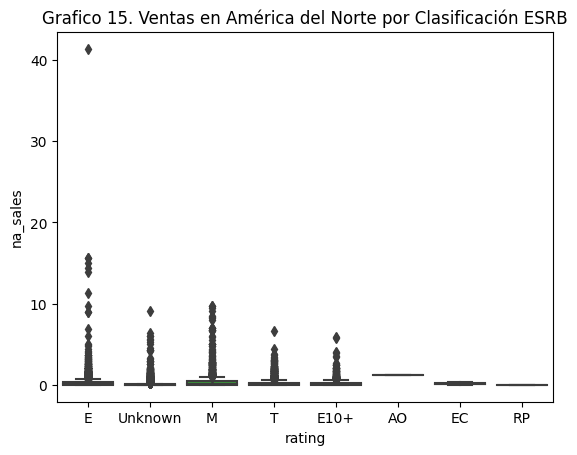

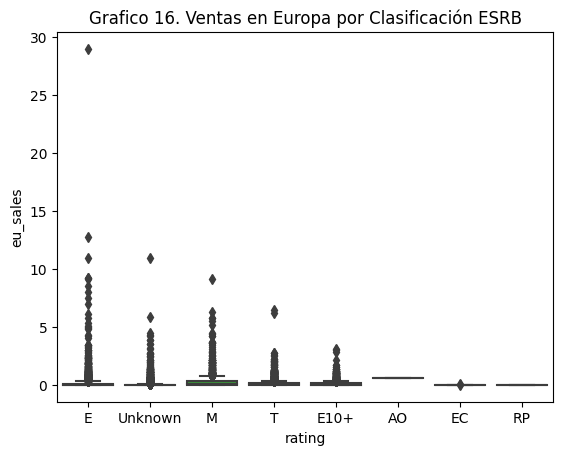

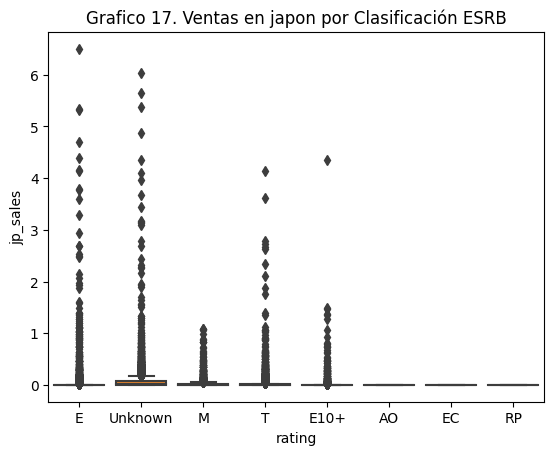

In [109]:
# Sales by ESRB Rating
sns.boxplot(x='rating', y='na_sales', data = filtered_data_games)
plt.title('Grafico 15. Ventas en América del Norte por Clasificación ESRB')
plt.show()

sns.boxplot(x='rating', y='eu_sales', data = filtered_data_games)
plt.title('Grafico 16. Ventas en Europa por Clasificación ESRB')
plt.show()

sns.boxplot(x='rating', y='jp_sales', data = filtered_data_games)
plt.title('Grafico 17. Ventas en japon por Clasificación ESRB')
plt.show()

#### Observations ####

Chart 15. Sales in North America by ESRB Rating

* E (Everyone): Games rated E seem to have the highest sales in North America, with several games selling over 10 million units.
* Unknown: Games with an unknown rating also show significant sales, though less consistent than those rated E.
* M (Mature): Games rated M have reasonable sales, with some reaching around 10 million units.
* T (Teen) and E10+ (Everyone 10 and older): These ratings show lower sales compared to E and M.
* AO (Adults Only), EC (Early Childhood), and RP (Rating Pending): These ratings have minimal or insignificant sales.

Chart 16. Sales in Europe by ESRB Rating

* E (Everyone): Similar to North America, E-rated games have the highest sales in Europe.
* Unknown: Games with an unknown rating also perform well, but less so than in North America.
* M (Mature): Sales of M-rated games are significant, though generally lower than E-rated games.
* T (Teen) and E10+ (Everyone 10 and older): These ratings show lower sales compared to E and M.
* AO (Adults Only), EC (Early Childhood), and RP (Rating Pending): Minimal or no sales.

Chart 17. Sales in Japan by ESRB Rating

* E (Everyone): E-rated games also have the highest sales in Japan, although not as high as in North America and Europe.
* Unknown: In Japan, games with an unknown rating perform notably well.
* M (Mature): Sales of M-rated games are much lower compared to E and unknown-rated games.
* T (Teen) and E10+ (Everyone 10 and older): These ratings have low sales.
* AO (Adults Only), EC (Early Childhood), and RP (Rating Pending): Minimal or no sales.

#### Conclusions ####

* E Rating (Everyone): This is the most successful rating in terms of sales across all regions, suggesting that games suitable for all ages have a broader and more appealing market.

* Unknown Rating: Games without a clear rating also have strong sales, especially in Japan. This may indicate that some popular games have not been officially rated or that ratings are not as strict in certain markets.

* M Rating (Mature): Mature games perform well, but they do not reach the sales numbers of E-rated games. North America shows greater acceptance of these games compared to Europe and Japan.

* Other Ratings (T, E10+, AO, EC, RP): These ratings have significantly lower sales, suggesting less interest or a more limited market for these games.

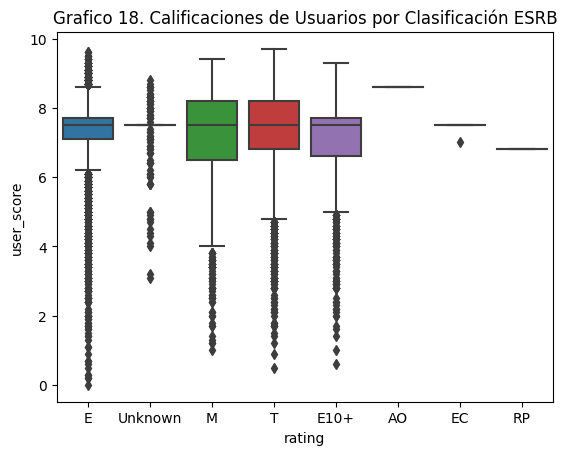

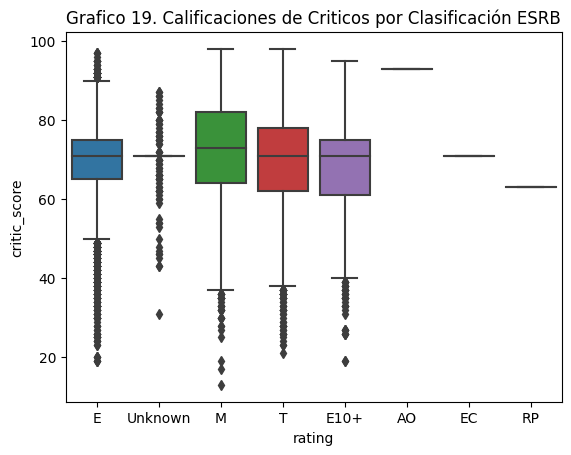

In [110]:
# User ratings by ESRB Rating
sns.boxplot(x='rating', y='user_score', data = filtered_data_games)
plt.title('Grafico 18. Calificaciones de Usuarios por Clasificación ESRB')
plt.show()

sns.boxplot(x='rating', y='critic_score', data = filtered_data_games)
plt.title('Grafico 19. Calificaciones de Criticos por Clasificación ESRB')
plt.show()

#### Observations ####

Graph 18: User Ratings by ESRB Rating

Rating E (Everyone):

* High Median: The median of user ratings is high, around 8.
* Interquartile Range: The interquartile range is relatively narrow, indicating that most ratings are clustered around the median.
* Distribution: There are some low outliers, but most games have good ratings.

Rating Unknown:

* High Median: Similar to rating E, the median is high, also around 8.
* Interquartile Range: Wide, indicating more variability in the ratings.
* Distribution: There are many low and high outliers, suggesting greater dispersion in the ratings.

Rating M (Mature):

* High Median: The median is slightly lower than E and Unknown, but still high, around 8.
* Interquartile Range: Similar to E, but with more dispersion in the lower values.
* Distribution: Several low outliers, but most ratings are still good.

Rating T (Teen):

* High Median: The median is high, around 8.
* Interquartile Range: Relatively narrow.
* Distribution: Similar to M, with some low outliers.

Rating E10+ (Everyone 10 and older):

* High Median: The median is slightly lower than the previous ratings, but still close to 8.
* Interquartile Range: Similar to T, with a good concentration of ratings around the median.
* Distribution: Some low outliers.

Ratings AO, EC, and RP:

* AO and RP: Very few data points, but the ratings tend to be high.
* EC: Few ratings, but all quite high.

Graph 19: Critic Ratings by ESRB Rating

Rating E (Everyone):

* High Median: The median is high, around 75-80.
* Interquartile Range: Narrow, indicating that the ratings are clustered around the median.
* Distribution: There are several low outliers, but most games have good ratings.

Rating Unknown:

* High Median: Similar to E, the median is high, around 80.
* Interquartile Range: Wide, indicating more variability in the ratings.
* Distribution: Many low and high outliers, suggesting significant dispersion in the ratings.

Rating M (Mature):

* High Median: The median is slightly lower than E and Unknown, but still high, around 75-80.
* Interquartile Range: Similar to E, but with more dispersion in the lower values.
* Distribution: Several low outliers.

Rating T (Teen):

* High Median: The median is high, around 75-80.
* Interquartile Range: Relatively narrow.
* Distribution: Similar to M, with some low outliers.

Rating E10+ (Everyone 10 and older):

* High Median: The median is slightly lower than the previous ratings, but still close to 75.
* Interquartile Range: Similar to T.
* Distribution: Some low outliers.

Ratings AO, EC, and RP:

* AO and RP: Very few data points, but the ratings tend to be high.
* EC: Few ratings, but all quite high.

#### Conclusions ####

* High Ratings: Both user and critic ratings tend to be high for most ESRB ratings, especially E, M, and T.
* Rating Variability: There is more dispersion in the ratings of games with the Unknown classification, both from users and critics.
* Outliers: There are several low outliers in user and critic ratings, especially in the E and M ratings, suggesting that some games in these categories were not well-received.
* Less Common Ratings: AO, EC, and RP ratings have very few games and generally tend to have high ratings.

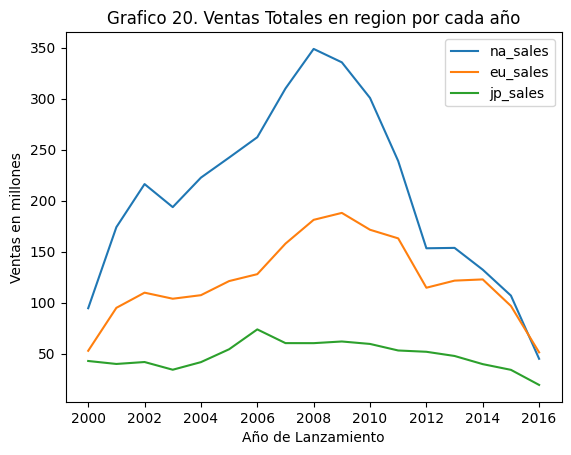

In [111]:
# Sales by Year
sales_per_year = filtered_data_games.groupby('year_of_release')[['na_sales','eu_sales','jp_sales']].sum().plot(kind='line')
plt.title('Grafico 20. Ventas Totales en region por cada año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas en millones')
plt.show()

#### Observations ####

* Sales in North America (NA) were the highest compared to Europe (EU) and Japan (JP).
* There was a significant increase in sales across all regions until approximately 2008, followed by a steady decline.
* Sales in Japan were consistently lower compared to the other two regions.

#### Conclusions ####

* The North American market is the most profitable for video games, followed by Europe and then Japan.
* The video game industry experienced a peak around 2008 and then entered a decline. This could be due to changes in the market, such as the emergence of new platforms or shifts in consumer habits.

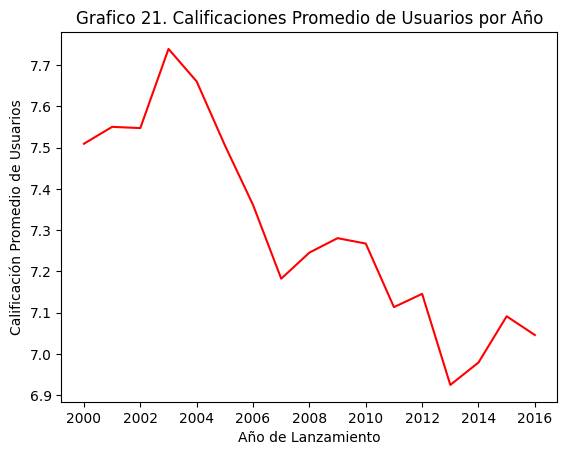

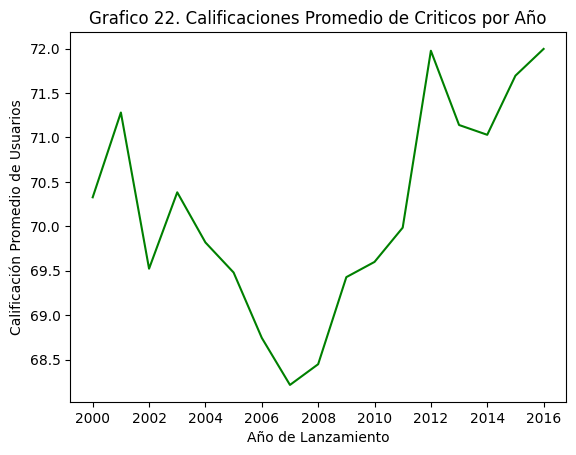

In [112]:
# User ratings by Year
user_score_per_year = filtered_data_games.groupby('year_of_release')['user_score'].mean().plot(kind='line', color = 'red')
plt.title('Grafico 21. Calificaciones Promedio de Usuarios por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio de Usuarios')
plt.show()

# Critics ratings by Year
critic_score_per_year = filtered_data_games.groupby('year_of_release')['critic_score'].mean().plot(kind='line', color = 'green')
plt.title('Grafico 22. Calificaciones Promedio de Criticos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio de Usuarios')
plt.show()

**Chart 21: Average User Ratings by Year**

**Observations**

* User ratings showed a declining trend from 2004 to around 2014, with some fluctuations.
* From 2014 onwards, there seems to be a slight recovery, though the ratings remain lower compared to the earlier years of the analyzed period.

**Conclusion:**

* User ratings have decreased over time, which could indicate a decline in player satisfaction with games released in later years.
* It is possible that user expectations have increased or the perceived quality of games has declined.

**Chart 22: Average Critic Ratings by Year**

**Observations**

* Critic ratings also show a declining trend until around 2008, followed by a recovery and peaks in the following years.
* From 2010 onwards, critic ratings have shown an upward trend.

**Conclusion:**

* Although critic ratings initially declined, there has been a recovery in the critical perception of games.
* This could indicate an improvement in the quality of games released after 2010 from the critics' perspective, despite the decline in user ratings.

## Final Conclusions of the Case Study ##

**Periods with Different Data Significance**

* 1980s - 1990s: Few releases, making the data less representative.
* 1995 - 2010: Period with sustained growth and numerous releases, highly representative of the industry.
* 2011 - 2016: Despite a decrease in the number of releases, these years still have enough data to be considered representative.

**Sales Trends by Platform**

**Dominant Platforms in Sales:**

* PS2, X360, PS3, Wii, and DS: High total sales, although some show a declining trend in recent years.
* PS4 and XOne: Show a notable increase in sales in the last years of the analyzed period, indicating potential for continued growth.
* Platforms with Growth Potential: PS4, XOne, 3DS, and PC are platforms that show recent relevance and growth potential in 2017.

**Video Game Genre Analysis**

**Most Profitable Genres:**

* Action and Sports: With the highest total sales, they are extremely popular genres.
* Shooter and Role-Playing: Also show high sales, indicating a dedicated player base.
* Less Profitable Genres: Strategy and Puzzle have relatively low sales, suggesting smaller market niches.

**Impact of ESRB Ratings on Sales**

* E (Everyone) Rating: Highest sales in North America and Europe, with strong popularity.
* Unknown Rating: Has a significant impact on sales, particularly in Japan.
* M (Mature) Rating: Shows reasonable sales, being relevant in multiple regions.

**Analysis of User and Critic Scores**

**Correlation between Scores and Sales:**

* User Score: No significant relationship between user scores and game sales.
* Critic Score: There is a moderate positive correlation between critic scores and sales, suggesting that professional reviews may influence sales.

**Hypotheses and Statistical Results**

* Xbox One vs. PC Platforms: A significant difference was found in average user ratings, indicating different perceptions based on the platform.
* Action vs. Sports Genres: No significant differences were found in average user ratings between these genres.

**Recommendations for 2017**

**Platform Selection for Advertising Campaigns:**

* Focus on PS4 and XOne due to their recent growth and market potential.
* Consider 3DS and PC for their consistent relevance and dedicated user base.

**Genres for Promotion:**

* Prioritize Action, Sports, and Shooter games, given their high sales performance.

**Marketing Strategies:**

* Leverage high sales of E-rated games for campaigns in North America and Europe.
* Consider the significant impact of Unknown ratings in Japan.